In [2]:
using TipiFEM.Meshes
using TipiFEM.Simple1DMesh

The method will not be callable.


In [1]:
# solution function
u(x) = sin(π*x)
f(x) = -π^2sin(π*x)
# domain
x = [0, 1]
y = u(x)
N = 40
h = 1/(N+1)

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in sin(::Array{Float64,1}) at ./deprecated.jl:50
 in u(::Array{Int64,1}) at ./In[1]:2
 in include_string(::String, ::String) at ./loading.jl:478
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tehrengruber/.julia/v0.6/IJulia/src/execute_request.jl:157
 in eventloop(::ZMQ.Socket) at /home/tehrengruber/.julia/v0.6/IJulia/src/eventloop.jl:8
 in (::IJulia.##13#19)() at ./task.jl:404
while loading In[1], in expression starting on line 6


0.024390243902439025

In [4]:
using PyPlot

INFO: Recompiling stale cache file /home/tehrengruber/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


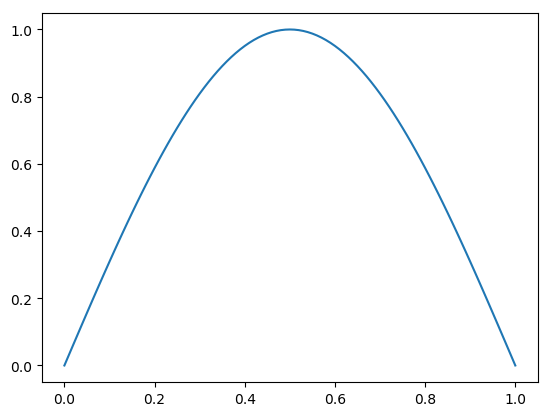

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in sin(::FloatRange{Float64}) at ./deprecated.jl:50
 in u(::FloatRange{Float64}) at ./In[1]:2
 in include_string(::String, ::String) at ./loading.jl:478
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tehrengruber/.julia/v0.6/IJulia/src/execute_request.jl:157
 in eventloop(::ZMQ.Socket) at /home/tehrengruber/.julia/v0.6/IJulia/src/eventloop.jl:8
 in (::IJulia.##13#19)() at ./task.jl:404
while loading In[5], in expression starting on line 1


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbaea1c3710>

In [5]:
plot(x[1]:0.01:x[2], u(x[1]:0.01:x[2]), "-")

In [24]:
function global_basis(xi, h)
    x -> begin
        if xi-h <= x <= xi
            (x-xi+h)/h
        elseif xi < x <= xi+h
            -(x-xi)/h+1
        else
            0
        end
    end
end
function global_basis_diff(xi, h)
    x -> begin
        if xi-h <= x <= xi
            1/h
        elseif xi < x <= xi+h
            -1/h
        else
            0
        end
    end
end
integrate(f, x0, x1; N=20) = 1/N * sum(f.(x0:((x1-x0)/(N-1)):x1))

integrate (generic function with 1 method)

In [25]:
integrate(x->x^2, 0, 1, N=20)

0.3421052631578947

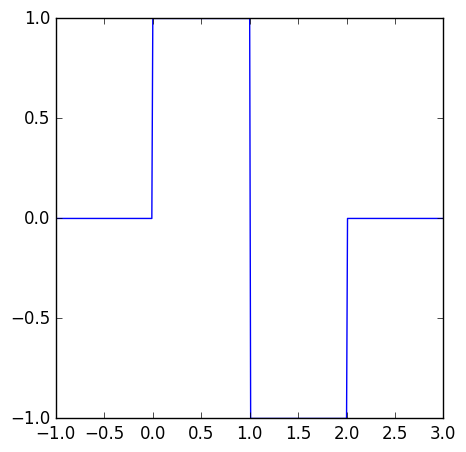

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbf2cac7f50>

In [26]:
fig = figure(figsize=(5,5))
plot(-1:0.01:3, global_basis_diff(1, 1).(-1:0.01:3))

In [27]:
fig = figure(figsize=(5,5))
nodes = x[1]+h:h:x[2]-h
display(collect(nodes))

40-element Array{Float64,1}:
 0.0243902
 0.0487805
 0.0731707
 0.097561 
 0.121951 
 0.146341 
 0.170732 
 0.195122 
 0.219512 
 0.243902 
 0.268293 
 0.292683 
 0.317073 
 ⋮        
 0.707317 
 0.731707 
 0.756098 
 0.780488 
 0.804878 
 0.829268 
 0.853659 
 0.878049 
 0.902439 
 0.926829 
 0.95122  
 0.97561  

40-element Array{Float64,1}:
  0.0        
 -0.0613752  
 -0.0115078  
 -0.0719463  
 -0.033206   
 -0.078244   
 -0.0704196  
 -0.0751668  
 -0.128857   
 -0.0567292  
 -0.212734   
 -0.01789    
 -0.32202    
  ⋮          
 -0.01789    
 -0.212734   
 -0.0567292  
 -0.128857   
 -0.0751668  
 -0.0704196  
 -0.078244   
 -0.033206   
 -0.0719463  
 -0.0115078  
 -0.0613752  
  4.44089e-17

40×40 Array{Float64,2}:
  82.369  -40.344    0.0      0.0    …    0.0      0.0      0.0      0.0  
 -40.344   82.369  -42.025    0.0         0.0      0.0      0.0      0.0  
   0.0    -42.025   82.369  -40.344       0.0      0.0      0.0      0.0  
   0.0      0.0    -40.344   80.688       0.0      0.0      0.0      0.0  
   0.0      0.0      0.0    -40.344       0.0      0.0      0.0      0.0  
   0.0      0.0      0.0      0.0    …    0.0      0.0      0.0      0.0  
   0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0  
   0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0  
   0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0  
   0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0  
   0.0      0.0      0.0      0.0    …    0.0      0.0      0.0      0.0  
   0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0  
   0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0  
 

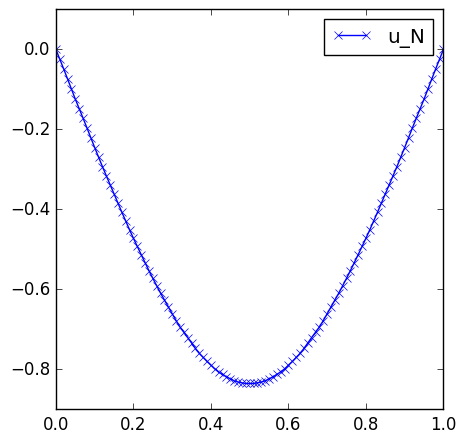

PyObject <matplotlib.legend.Legend object at 0x7fbf2c9424d0>

In [30]:
fig = figure(figsize=(5,5))
nodes = x[1]+h:h:x[2]-h
# assemble galerkin matrix
A = zeros(length(nodes), length(nodes))
for (i, xi)=enumerate(nodes)
    #plot(x[1]:0.01:x[2], global_basis(xi, h).(x[1]:0.01:x[2]), "-x",label=i)
    #plot(x[1]:0.01:x[2], global_basis_diff(xi, h).(x[1]:0.01:x[2]), "-x",label=i)
    for (j, xj)=enumerate(nodes)
        A[i, j] += integrate(x -> global_basis_diff(xi, h)(x)*global_basis_diff(xj, h)(x), x[1], x[2], N=1000)
    end
end
# assemble right hand side
φ = zeros(length(nodes))
for (i, xi)=enumerate(nodes)
    φ[i] += integrate(x -> f(x)*global_basis(xi, h)(x), x[1], x[2])
end

display(φ)
display(A)

μ = A\φ

u_N = (x) -> let result = 0.
    for (i, xi) in enumerate(nodes)
        result += μ[i] * global_basis(xi, h)(x)
    end
    result
end
plot(x[1]:0.01:x[2], u_N.(x[1]:0.01:x[2]), "-x",label="u_N")
legend()

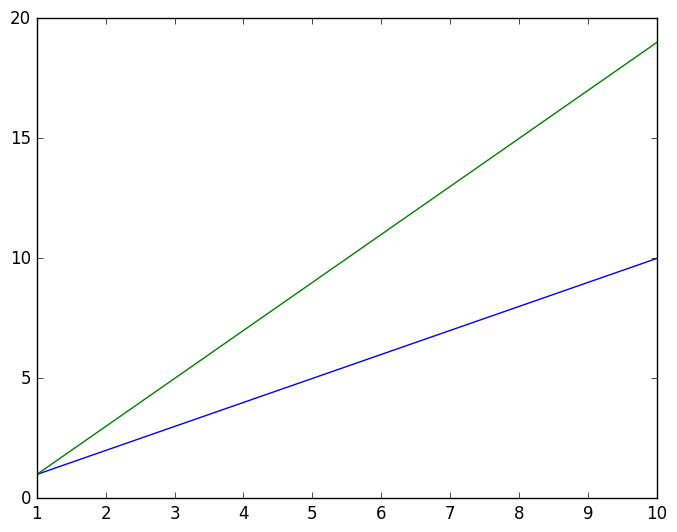

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7d78f31690>

In [42]:
plot(1:10, 1:10)
plot(1:10, 1:2:20)